# Classification

## Import and functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

sns.set(style = "darkgrid")

In [2]:
import itertools
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

classes_name=["no diabet","diabet"]

In [3]:
from sklearn.metrics import accuracy_score, roc_auc_score

def get_preds(model):
    model.fit(X_train_scaled, y_train)
    y_pred_test = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test_proba = model.predict_proba(X_test_scaled)
    return y_pred_test, y_pred_test_proba, y_pred_train

def get_acc(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    return acc

def get_auc(y_true, y_pred_proba):
    auc = roc_auc_score(y_true, y_pred_proba[:, 1])
    return auc

## 1 Datasets description

### 1.3 Loading the data

**Q1 : Load the data with np.load("filename.npz") and store the different matrices in memory (for instance
in variables x1,y1 for Pima data and x2,y2,xt2,yt2 for digits data). For the digits dataset,
it is better to perform one simple pre-processing that scales the values between [0, 1] by dividing the
data matrix by 255.**

In [4]:
data_pima = np.load('pima.npz')
x_all = data_pima['xall']
y_all = data_pima['yall']
varnames = data_pima['varnames']

In [5]:
data_digits = np.load('digits.npz')
xt = data_digits['xt'] / 255.
yt = data_digits['yt']
x = data_digits['x'] / 255.
y = data_digits['y'] 

**Q2 : Do a quick look at the data, compute the mean values for each variable and interpret it.**

<u> PIMA

In [6]:
df_pima = pd.DataFrame(x_all, columns=varnames)
df_pima['has_diabet'] = y_all

In [7]:
df_pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,has_diabet
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,3.747532,121.607898,69.643159,20.765867,80.531735,32.453032,0.470961,33.021157,-0.317348
std,3.339502,30.490598,18.135582,15.899540,112.678399,6.950733,0.325256,11.669089,0.948978
min,0.000000,44.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,-1.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.243000,24.000000,-1.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.374000,29.000000,-1.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.629000,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.420000,81.000000,1.000000


<div class="alert alert-block alert-warning"> 

We study here 709 patients, who are all females of at least 21 years old and of Pima Indian heritage. (a group of Native Americans living in an area consisting of what is now central and southern Arizona, as well as northwestern Mexico)
</div>

Zoom on the features' average : 

In [8]:
df_pima.mean()

Pregnancies                   3.747532
Glucose                     121.607898
BloodPressure                69.643159
SkinThickness                20.765867
Insulin                      80.531735
BMI                          32.453032
DiabetesPedigreeFunction      0.470961
Age                          33.021157
has_diabet                   -0.317348
dtype: float64

<div class="alert alert-block alert-warning"> 

- The average number of pregnancies is 3.7 : it is quiet high when you know that the international average is approximatley 2 children per woman
- 120 mm Hg is considered to be a normal blood pressure, so the average is not surprising
- Triceps skin fold thickness : Normal 23mm so 20mm is a consistent average
- Insulin : Greater than 150 mu U/ml relates to insulin therapy
- BMI (Body mass index) : Ideal Range between 18.5-24.9, so 32 is a high average
- Glucose : normal when less than/equal to 110 mg/dL so idem, 121 is a high average
- Diabetes Pedigree Function:
a. =0.5 for parent, full sibling
b. =0.25 half sibling, grandparent, aunt, or uncle
c. =0.125 half aunt, half uncle, or first cousin 
0.47 seems to be a high average, and that's because the patient were selected cleverly

</div>

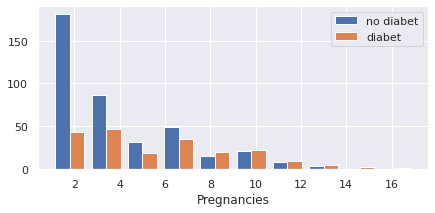

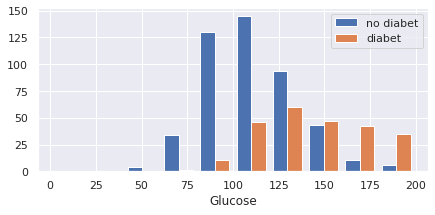

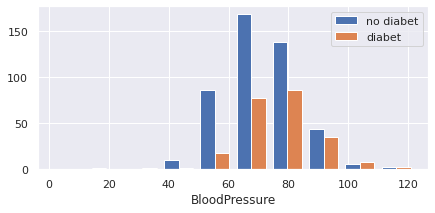

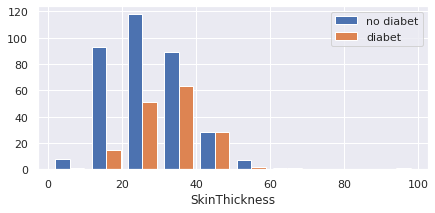

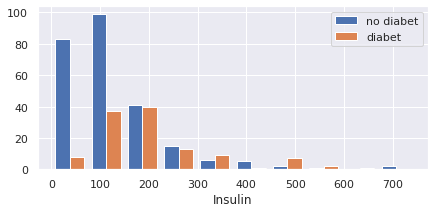

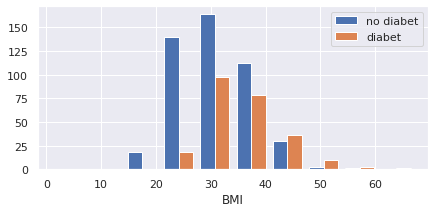

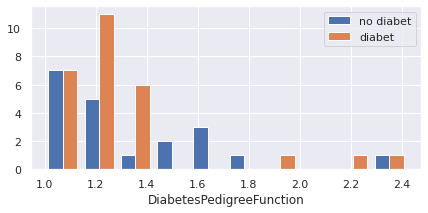

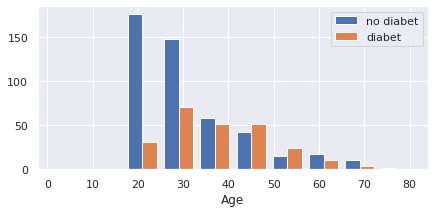

In [9]:
for col in varnames:
    diabet = df_pima[df_pima['has_diabet'] == 1][col]
    no_diabet = df_pima[df_pima['has_diabet'] == -1][col]

    maxx = max(df_pima[col])
    plt.figure(figsize=(7,3))
    plt.hist([no_diabet, diabet], range=(1, maxx))
    plt.legend(('no diabet', 'diabet'))
    plt.xlabel(col)
    plt.show()

<div class="alert alert-block alert-warning">
    
<b>Interpretation:</b> 

On these graphs, we can observe well known medical facts : 
- the more you have been pregnant, the more chance you have to be diabetic
- the more you have high level of glucose, BMI, blood pressure, age, DiabetesPedigreeFunction the more likely you are to be diabetic. 
    
These ideas will be better represented on a following graph !
</div>

<u> DIGITS 

20 samples of the training set


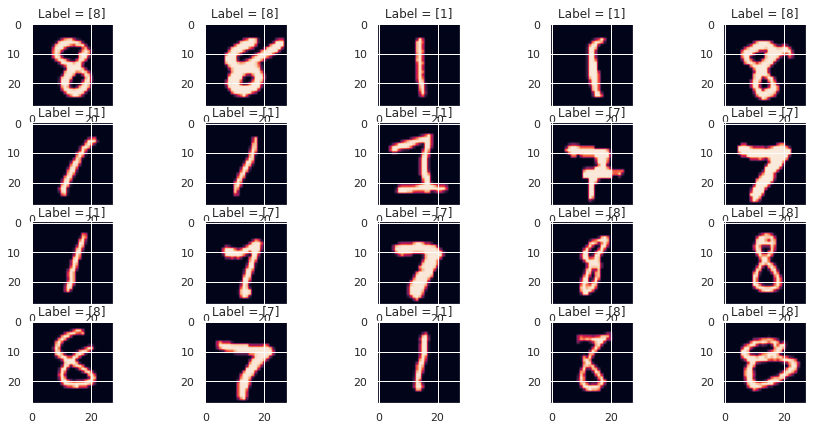

------------------------------------------------------------------------------
20 samples of the test set


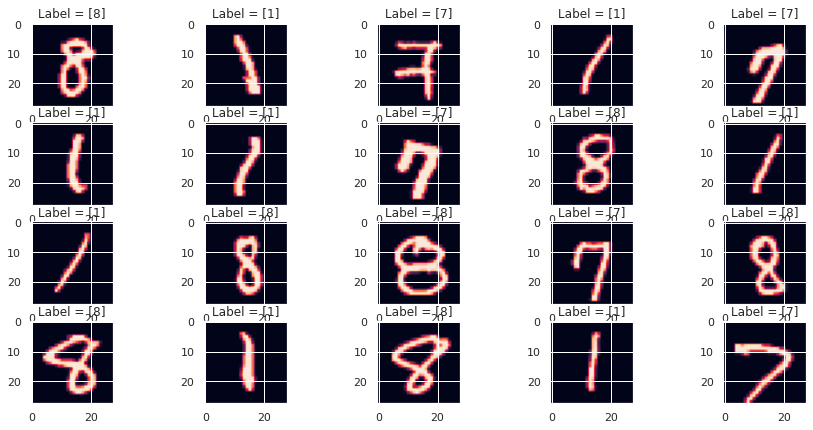

In [10]:
print("20 samples of the training set")

indexes = np.random.choice(np.arange(len(xt)), size=20)
plt.figure(figsize=(15,7))
for i, ind in enumerate(indexes):
    plt.subplot(4,5,i+1)
    plt.imshow(xt[ind].reshape(28, 28))
    plt.title(f'Label = {yt[ind]}')
plt.show()

print('------------------------------------------------------------------------------')
print("20 samples of the test set")

indexes = np.random.choice(np.arange(len(x)), size=20)
plt.figure(figsize=(15,7))
for i, ind in enumerate(indexes):
    plt.subplot(4,5,i+1)
    plt.imshow(x[ind].reshape(28, 28))
    plt.title(f'Label = {y[ind]}')
plt.show()

<div class="alert alert-block alert-warning">
    
This is a dataset that we already know thanks to another practical sessions. 
We can observe that there are different ways to write a seven (with and without a bar) and that will surely be a difficulty for the models, especially to distinguish 1 and 7. 

We can see that some numbers are drawn but do not seem to be finished. Even with a human eye, some digits are complex to classified !
</div>

## 2 Predicting Diabetes on the Pima dataset

### 2.1 Know the data

**Visualize the data as scatterplots between pairs of variables (where the color is the class).**

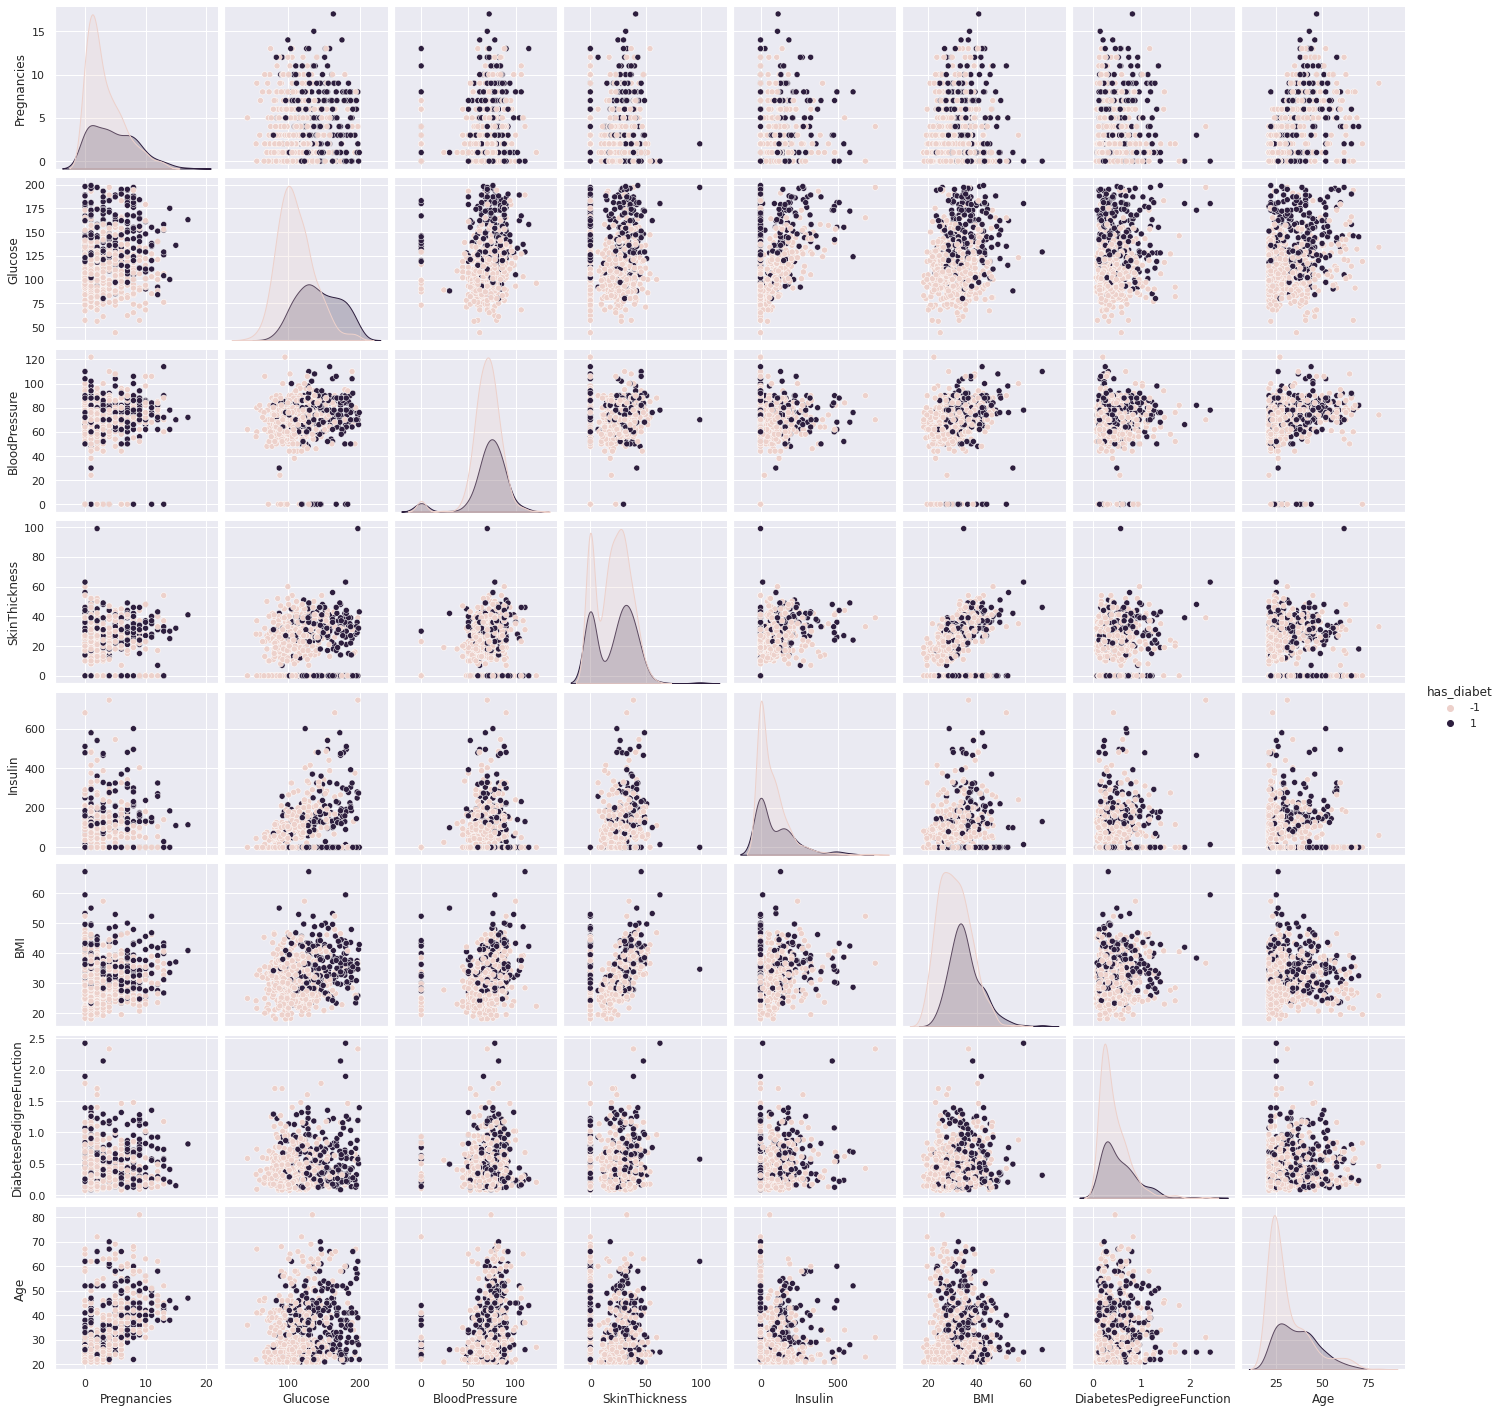

In [433]:
sns.pairplot(data=df_pima, hue='has_diabet')
plt.show()

<div class="alert alert-block alert-warning">
We can see that the distribution of several features are very different according to the class 'diabetic' or 'non diabetic'. On particular, some distributions seems to be shifted to the right for the diabetic class, like age, glucose or pregnancies.
    
What is also interesting with this plot is the correlation between the features. 
In particular, BMI and SkinThickness seems to be linearly correlated, what's logical. 
</div>

**What are the variables that seem to help predict the class? Do those variable make sense from a
medical perspective ?**

<div class="alert alert-block alert-warning">

We see that for the distributions of the labels 1 and -1 are very different for the features Glucose, BMI and Age. People who have a high value of Plasma glucose concentration, BMI and age seems more likey to have diabetes, which makes sens form a medical perspective.
The same remark is true for the number of pregnancies.
    
</div>

**Split the data in training/test by keeping n = 300 samples for training/validation and the remaining
for test.**

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, train_size=300, random_state=7)

**Do the feature have similar variances/scaling? Is that a problem?**

In [12]:
df_pima.std()

Pregnancies                   3.339502
Glucose                      30.490598
BloodPressure                18.135582
SkinThickness                15.899540
Insulin                     112.678399
BMI                           6.950733
DiabetesPedigreeFunction      0.325256
Age                          11.669089
has_diabet                    0.948978
dtype: float64

<div class="alert alert-block alert-warning">

The standard deviations are very different according to the different features. The standard deviation is 0.3 for DiabetesPedigreeFunction and 112 for Insulin. It is effectively a problem. If we don't scale our data, the Insulin will have more weight in our prediction than DiabetesPedigreeFunction.
</div>

**Apply a standardization to the training and test data (StandardScaler).**

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 2.2 Bayesian decision and linear classification

**Train a Linear Discriminant Analysis (LDA) classifier with the default parameters, compute its accuracy
and AUC on the test data (LinearDiscriminantAnalysis,roc_auc_score). Note that in order
to compute the AUC you will need to compute the score with est.predict_proba and keep the second
column (probability of the class 1).**

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(solver='lsqr')
model_name = 'LDA'
y_pred_test, y_pred_proba, y_pred_train = get_preds(LDA)
print(f'Accuracy (test) : {get_acc(y_test, y_pred_test):.3f}')
print(f'AUC (test): {get_auc(y_test, y_pred_proba):.3f}')

Accuracy (test) : 0.780
AUC (test): 0.834


That's already satisfying for a first test : 78% of accuracy when we want to predict if a patient has diabete or not using only 8 features about him !

Let's create a function in order to add the performances of a model in a pandas DataFrame !

In [15]:
def add_perf(df_score, model_name, y_pred_test, y_pred_proba, y_pred_train):
    res = {
        'model' : [model_name], 
        'test_acc': [get_acc(y_test, y_pred_test)],
        'test_auc': [get_auc(y_test, y_pred_proba)],
        'train_acc' : [get_acc(y_train, y_pred_train)]
        }

    tmp = pd.DataFrame(res)
    df_score = pd.concat([df_score, tmp], ignore_index = True)
    return df_score

columns = ['model', 'test_acc', 'test_auc', 'train_acc']
df_score = pd.DataFrame(columns=columns)
df_score = add_perf(df_score, model_name, y_pred_test, y_pred_proba, y_pred_train)
df_score

,model,test_acc,test_auc,train_acc
0,LDA,0.779951,0.834017,0.776667


**Perform a cross validation GridSearchCV) for the parameters of the method (shrinkage). Does the
validation leads to better performance? What is the optimal value for the parameter?**

In [16]:
from sklearn.model_selection import GridSearchCV

list_shrinkage = np.arange(1,100)/100
parameters = {'shrinkage' : list_shrinkage}

LDA = LinearDiscriminantAnalysis(solver='lsqr')
clf  = GridSearchCV(LDA, parameters)
clf.fit(X_train_scaled, y_train)

print('Best value of shrinkage :', clf.best_estimator_.get_params()['shrinkage'])

Best value of shrinkage : 0.01


***Remark :*** Shrinkage is analogous to penalty L1/L2 term used for regularizing and providing a better fit.

In [17]:
best_LDA = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.37)
y_pred_test, y_pred_proba, y_pred_train = get_preds(best_LDA)
df_score = add_perf(df_score, 'LDA tuned', y_pred_test, y_pred_proba, y_pred_train)

In [18]:
df_score

,model,test_acc,test_auc,train_acc
0,LDA,0.779951,0.834017,0.776667
1,LDA tuned,0.789731,0.841812,0.766667


The validation leads to better performance : we have a higher accuracy and AUC score.
We have gained 1% of accuracy !
So when we add some regularization, we obtained a better LDA fit for this problem. 


**Train a Quadratic Discriminant Analysis (QDA) classifier with the default parameters, compute its
accuracy and AUC on the test data (QuadraticDiscriminantAnalysis). Is the performance better
than LDA?**

In [20]:
QDA = QuadraticDiscriminantAnalysis()
y_pred_test, y_pred_proba, y_pred_train = get_preds(QDA)
print(f'Accuracy (test) : {get_acc(y_test, y_pred_test):.3f}')
print(f'AUC (test): {get_auc(y_test, y_pred_proba):.3f}')
df_score = add_perf(df_score, 'QDA', y_pred_test, y_pred_proba, y_pred_train)

Accuracy (test) : 0.763
AUC (test): 0.818


In [21]:
df_score

,model,test_acc,test_auc,train_acc
0,LDA,0.779951,0.834017,0.776667
1,LDA tuned,0.789731,0.841812,0.766667
2,QDA,0.762836,0.818072,0.780000


The performance is lower than the one of LDA. We don't need a quadratic term here : a 'simple' linear classifier is suficient !

**Perform a cross validation for the parameters of the method (reg_param). Does the validation leads
to better performance? What is the optimal value for the parameter.**

In [22]:
list_reg = np.arange(1,100)/100
parameters = {'reg_param' : list_reg}

QDA = QuadraticDiscriminantAnalysis()
clf  = GridSearchCV(QDA, parameters)
clf.fit(X_train_scaled, y_train)

print('Best value of reg_param :', clf.best_estimator_.get_params()['reg_param'])

Best value of reg_param : 0.6


In [23]:
best_QDA = clf.best_estimator_
y_pred_test, y_pred_proba, y_pred_train = get_preds(best_QDA)
print(f'Accuracy (test) : {get_acc(y_test, y_pred_test):.3f}')
print(f'AUC (test): {get_auc(y_test, y_pred_proba):.3f}')
df_score = add_perf(df_score, 'QDA tuned', y_pred_test, y_pred_proba, y_pred_train)

Accuracy (test) : 0.790
AUC (test): 0.838


In [24]:
df_score

,model,test_acc,test_auc,train_acc
0,LDA,0.779951,0.834017,0.776667
1,LDA tuned,0.789731,0.841812,0.766667
2,QDA,0.762836,0.818072,0.780000
3,QDA tuned,0.789731,0.838448,0.793333


The validation of the reg_param leads to better performance than the QDA with default parameters.
However LDA classifier is still better (the AUC is better). 

**Train a Gaussian Naive Bayes (NB) classifier (GaussianNB). What is its performance with respect to
QDA and LDA?**

In [25]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred_test, y_pred_proba, y_pred_train = get_preds(gnb)
print(f'Accuracy (test) : {get_acc(y_test, y_pred_test):.3f}')
print(f'AUC (test): {get_auc(y_test, y_pred_proba):.3f}')
df_score = add_perf(df_score, 'GaussianNB', y_pred_test, y_pred_proba, y_pred_train)

Accuracy (test) : 0.785
AUC (test): 0.830


In [26]:
df_score

,model,test_acc,test_auc,train_acc
0,LDA,0.779951,0.834017,0.776667
1,LDA tuned,0.789731,0.841812,0.766667
2,QDA,0.762836,0.818072,0.780000
3,QDA tuned,0.789731,0.838448,0.793333
4,GaussianNB,0.784841,0.829669,0.766667


The accuracy of 78.4% is quiet good, but the LDA Classifier is still better. The 'validated/tuned' QDA has also better performances than the Naive Bayes Classifier.

**Train a Logistic regression classifier (LogisticRegression) with the default parameters. Compute its
performance and compare it to the previous classifiers.**

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
y_pred_test, y_pred_proba, y_pred_train = get_preds(lr)
print(f'Accuracy (test) : {get_acc(y_test, y_pred_test):.3f}')
print(f'AUC (test): {get_auc(y_test, y_pred_proba):.3f}')
df_score = add_perf(df_score, 'LogisticRegression', y_pred_test, y_pred_proba, y_pred_train)

Accuracy (test) : 0.778
AUC (test): 0.839


In [28]:
df_score

,model,test_acc,test_auc,train_acc
0,LDA,0.779951,0.834017,0.776667
1,LDA tuned,0.789731,0.841812,0.766667
2,QDA,0.762836,0.818072,0.780000
3,QDA tuned,0.789731,0.838448,0.793333
4,GaussianNB,0.784841,0.829669,0.766667
5,LogisticRegression,0.777506,0.839159,0.783333


The accuracy of 77.7% does not make it a top classifier for this application !

**Perform a a cross validation for the parameters of the model (C) by setting the penalization to L1. Is
the model sparse? What variables were removed from the model? Is the classifier performing well?**

In [29]:
list_C = [0.1, 0.2, 0.5, 1, 2, 5, 10]
parameters = {'C' : list_C}

log_reg = LogisticRegression(penalty='l1', solver='liblinear')
clf  = GridSearchCV(log_reg, parameters)
clf.fit(X_train_scaled, y_train)

best_log_reg = clf.best_estimator_

print(f"Best value of C : {clf.best_estimator_.get_params()['C']}")

Best value of C : 0.1


Accuracy (test) : 0.763
AUC (test): 0.818


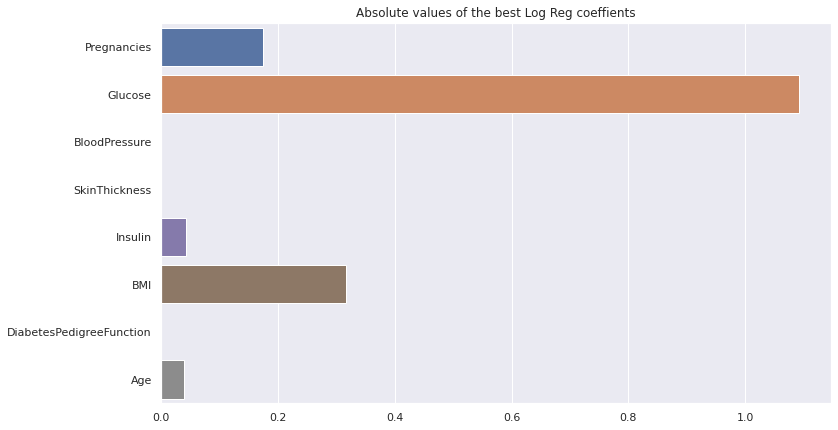

In [30]:
y_pred_test, y_pred_proba, y_pred_train = get_preds(best_log_reg)
print(f'Accuracy (test) : {get_acc(y_test, y_pred_test):.3f}')
print(f'AUC (test): {get_auc(y_test, y_pred_proba):.3f}')
df_score = add_perf(df_score, 'LogisticRegression tuned', y_pred_test, y_pred_proba, y_pred_train)

plt.figure(figsize=(12,7))
plt.title('Absolute values of the best Log Reg coeffients')
sns.barplot(x=np.abs(best_log_reg.coef_).flatten(), y=varnames)
plt.show()

<div class="alert alert-block alert-warning">

The model is sparse : DiabetesPedigreeFunction, BloodPressure and SkinThickness are not considered by the model.
The accuracy on the test set is only of 76% : the model is not among the best ones.
    
</div>


**What is the best decision method so far? Is the best model linear (LAD,LR) on quadratic (QDA,NB)?**

In [31]:
df_score

,model,test_acc,test_auc,train_acc
0,LDA,0.779951,0.834017,0.776667
1,LDA tuned,0.789731,0.841812,0.766667
2,QDA,0.762836,0.818072,0.780000
3,QDA tuned,0.789731,0.838448,0.793333
4,GaussianNB,0.784841,0.829669,0.766667
5,LogisticRegression,0.777506,0.839159,0.783333
6,LogisticRegression tuned,0.762836,0.818483,0.783333


The best decision method so far is LDA tuned : it's a linear model !

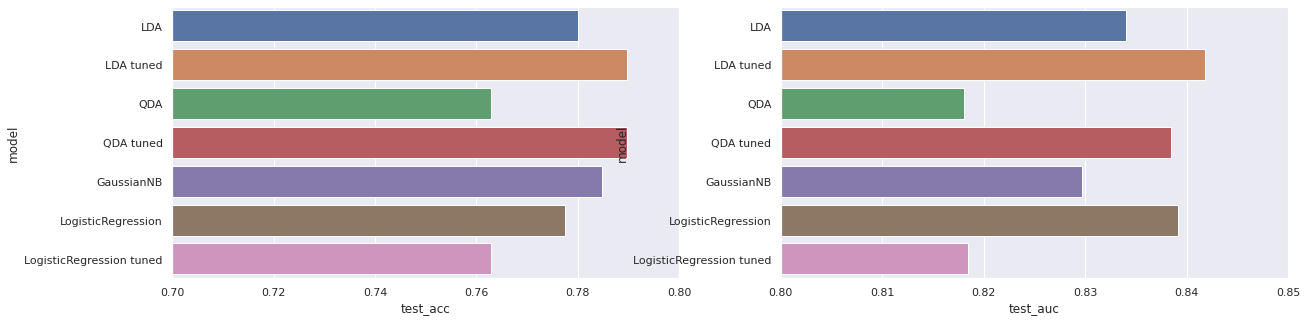

In [32]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(data=df_score, y='model', x='test_acc')
plt.xlim(0.7, 0.8)
plt.subplot(122)
sns.barplot(data=df_score, y='model', x='test_auc')
plt.xlim(0.8, 0.85)
plt.show()

**Interpret the separability of the sample in the predicted score space by plotting histograms for the
samples for each class in 1D.**

In [33]:
gnb = GaussianNB()
y_pred_test, y_pred_proba, y_pred_train = get_preds(gnb)

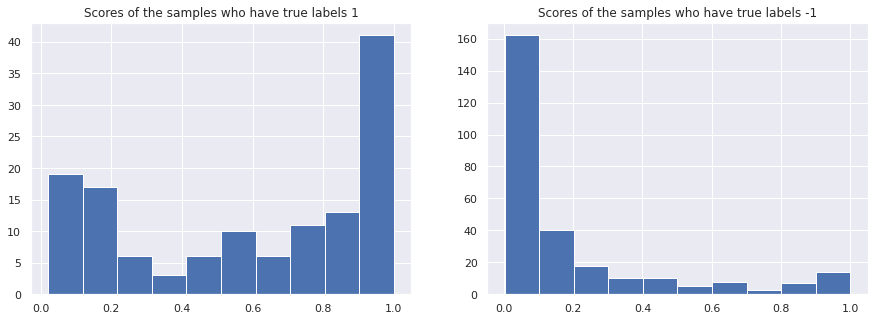

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Scores of the samples who have true labels 1')
plt.hist(y_pred_proba[y_test==1][:, 1])
plt.subplot(122)
plt.title('Scores of the samples who have true labels -1')
plt.hist(y_pred_proba[y_test==-1][:, 1])
plt.show()

<div class="alert alert-block alert-warning">

We can observe that : 

- the class -1 (no diabetes) seems easily separable. Most of the patient among the test set that don't have diabets have low score as we can see on the right curve. 
- It's much more difficult to predict the label 1 (diabetes). Soem patient have a score close to 0 whereas they have diabetes. It is a big problem from a medical point of view because it could be dangerous for these patients.
    
</div>

**Interpret the weight for a good linear model. What is the effect of each variable on the risk of diabetes?
Does it make medical sense?**

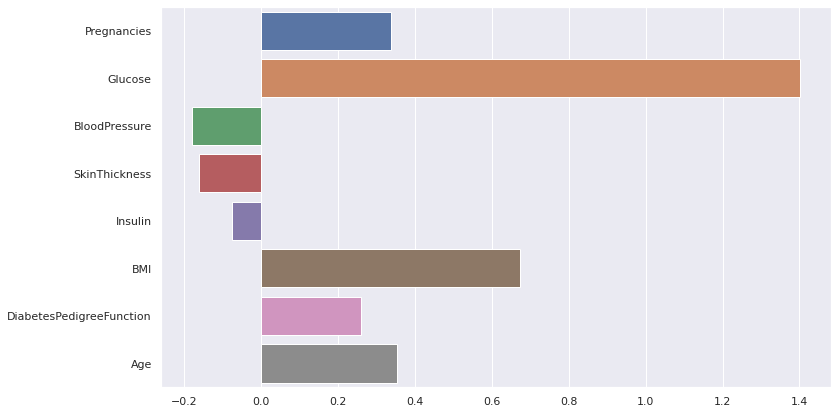

In [35]:
model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.37)
model.fit(X_train_scaled, y_train)

plt.figure(figsize=(12,7))
sns.barplot(x=model.coef_.flatten(), y=varnames)
plt.show()

<div class="alert alert-block alert-warning">
    
We interpret these coefficients by :
    
- The more you have been pregnant, the more likely you are to have diabetes.
- Idem for Glucose, BMI, Age and DiabetesPedigreeFunction, they vary in the same direction than the probability to have diabetes. 
- It's the opposite for Insulin, SkinThickness, and BloodPressure. 

All these observations are very logicial from a medical point of view. 
For example we now that a lack of Insulin is responsible for diabete. And that people with diabetes are likely to have important BMI. 
    
</div>


### 2.3 Nonlinear methods

For the following non-linear classifiers, RandomForestClassifier, SVC, MLPClassifier,
GradientBoostingClassifier do the following:

**Fit the model with the default parameters and compute its prediction performance. Is it better than
a linear estimator?**

In [36]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

rf = RandomForestClassifier()
svc = SVC(probability=True)
mlp = MLPClassifier()
gbc = GradientBoostingClassifier()

models = {
    'RandomForestClassifier':rf,
    'SVC':svc,
    'MLPClassifier':mlp,
    'GradientBoostingClassifier':gbc
         }

for model_name in models.keys():
    print('------------------------------------')
    print(f"Model : {model_name}")
    model = models[model_name]
    y_pred_test, y_pred_proba, y_pred_train = get_preds(model)
    print(f'Accuracy (test) : {get_acc(y_test, y_pred_test):.3f}')
    print(f'AUC (test): {get_auc(y_test, y_pred_proba):.3f}')
    df_score = add_perf(df_score, model_name, y_pred_test, y_pred_proba, y_pred_train)

------------------------------------
Model : RandomForestClassifier
Accuracy (test) : 0.760
AUC (test): 0.823
------------------------------------
Model : SVC
Accuracy (test) : 0.765
AUC (test): 0.828
------------------------------------
Model : MLPClassifier
Accuracy (test) : 0.765
AUC (test): 0.828
------------------------------------
Model : GradientBoostingClassifier
Accuracy (test) : 0.748
AUC (test): 0.816


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [37]:
df_score

,model,test_acc,test_auc,train_acc
0,LDA,0.779951,0.834017,0.776667
1,LDA tuned,0.789731,0.841812,0.766667
2,QDA,0.762836,0.818072,0.780000
3,QDA tuned,0.789731,0.838448,0.793333
4,GaussianNB,0.784841,0.829669,0.766667
5,LogisticRegression,0.777506,0.839159,0.783333
6,LogisticRegression tuned,0.762836,0.818483,0.783333
7,RandomForestClassifier,0.760391,0.823023,1.000000
8,SVC,0.765281,0.827946,0.856667
9,MLPClassifier,0.765281,0.827672,0.856667


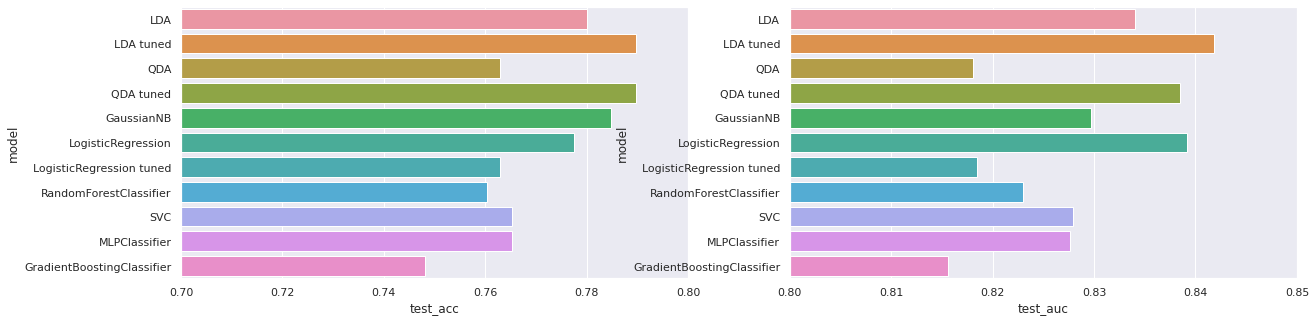

In [38]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(data=df_score, y='model', x='test_acc')
plt.xlim(0.7, 0.8)
plt.subplot(122)
sns.barplot(data=df_score, y='model', x='test_auc')
plt.xlim(0.8, 0.85)
plt.show()

<div class="alert alert-block alert-warning">

The best classifier is still a linear one, the LDA. This application shows again that we don't need a too complex model to attain good performances. Linear models are suficient.

</div>

**Do a quick validation of some of the important parameters (manually or with sklearn classes). Can
you find a better performance?**

#### A) SVC

In [39]:
from sklearn.model_selection import GridSearchCV
parameters = [{'kernel': ['rbf', 'poly'], 
               'C': [1, 10, 100, 1000, 10000]}]

print("Tuning hyper-parameters")
svc = GridSearchCV(SVC(probability=True), parameters, cv = 5)
svc.fit(X_train_scaled, y_train.ravel())

best_svc = svc.best_estimator_
C = best_svc.get_params()['C']
gamma = best_svc.get_params()['gamma']
kernel = best_svc.get_params()['kernel']
print(f'BEST PARAMETERS : C={C}, gamma={gamma}, kernel:{kernel}')

Tuning hyper-parameters
BEST PARAMETERS : C=1, gamma=scale, kernel:rbf


In [40]:
model_name = 'SVC tuned'
y_pred_test, y_pred_proba, y_pred_train = get_preds(best_svc)
print(f'Accuracy (test) : {get_acc(y_test, y_pred_test):.3f}')
print(f'AUC (test): {get_auc(y_test, y_pred_proba):.3f}')
df_score = add_perf(df_score, model_name, y_pred_test, y_pred_proba, y_pred_train)

Accuracy (test) : 0.765
AUC (test): 0.828


In [43]:
print(df_score[df_score.model == 'LDA'])
print(df_score[df_score.model == 'LDA tuned'])

  model  test_acc  test_auc  train_acc
0   LDA  0.779951  0.834017   0.776667
       model  test_acc  test_auc  train_acc
1  LDA tuned  0.789731  0.841812   0.766667


By doing a 5-Fold cross validation on C, gamma and on the kernel, we gained a little percent of performance ! 

#### B) RandomForestClassifier

In [44]:
parameters = {'n_estimators': [100, 200, 400],
               'max_depth': [10, 20, None],
               'min_samples_leaf': [1, 2, 4]
              }

print("Tuning hyper-parameters")
rf= GridSearchCV(RandomForestClassifier(), parameters, cv=3, verbose=3)
rf.fit(X_train_scaled, y_train.ravel())

best_rf = rf.best_estimator_
n_estimators = best_rf.get_params()['n_estimators']
max_depth = best_rf.get_params()['max_depth']
min_samples_leaf = best_rf.get_params()['min_samples_leaf']
print(f'n_estimators={n_estimators}, max_depth={max_depth}, min_samples_leaf={min_samples_leaf}')

Tuning hyper-parameters
Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END max_depth=10, min_samples_leaf=1, n_estimators=100;, score=0.790 total time=   0.1s
[CV 2/3] END max_depth=10, min_samples_leaf=1, n_estimators=100;, score=0.780 total time=   0.1s
[CV 3/3] END max_depth=10, min_samples_leaf=1, n_estimators=100;, score=0.720 total time=   0.1s
[CV 1/3] END max_depth=10, min_samples_leaf=1, n_estimators=200;, score=0.780 total time=   0.2s
[CV 2/3] END max_depth=10, min_samples_leaf=1, n_estimators=200;, score=0.750 total time=   0.2s
[CV 3/3] END max_depth=10, min_samples_leaf=1, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/3] END max_depth=10, min_samples_leaf=1, n_estimators=400;, score=0.760 total time=   0.6s
[CV 2/3] END max_depth=10, min_samples_leaf=1, n_estimators=400;, score=0.750 total time=   0.4s
[CV 3/3] END max_depth=10, min_samples_leaf=1, n_estimators=400;, score=0.770 total time=   0.5s
[CV 1/3] END max_depth=10, min_samples_lea

In [45]:
model_name = 'RandomForestClassifier tuned'
y_pred_test, y_pred_proba, y_pred_train = get_preds(best_rf)
print(f'Accuracy (test) : {get_acc(y_test, y_pred_test):.3f}')
print(f'AUC (test): {get_auc(y_test, y_pred_proba):.3f}')
df_score = add_perf(df_score, model_name, y_pred_test, y_pred_proba, y_pred_train)

Accuracy (test) : 0.765
AUC (test): 0.834


In [46]:
print(df_score[df_score.model == 'RandomForestClassifier'])
print(df_score[df_score.model == 'RandomForestClassifier tuned'])

                    model  test_acc  test_auc  train_acc
7  RandomForestClassifier  0.760391  0.823023        1.0
                           model  test_acc  test_auc  train_acc
12  RandomForestClassifier tuned  0.765281   0.83373        1.0


By doing a 5-Fold cross-validation on n_estimators, max_depth and min_samples_leaf, we gain 0.5% of accuracy, it's always a win-win.

#### C) MLPClassifier

In [47]:
parameters = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1],
               'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
              }

print("Tuning hyper-parameters")
mlp = GridSearchCV(MLPClassifier(), parameters, cv=3, verbose=3)
mlp.fit(X_train_scaled, y_train.ravel())

best_mlp = mlp.best_estimator_
alpha = best_mlp.get_params()['alpha']
hidden_layer_sizes = best_mlp.get_params()['hidden_layer_sizes']
print(f'alpha={alpha}, hidden_layer_sizes={hidden_layer_sizes}')

Tuning hyper-parameters
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=1e-05, hidden_layer_sizes=(50, 50, 50);, score=0.770 total time=   0.5s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=1e-05, hidden_layer_sizes=(50, 50, 50);, score=0.800 total time=   0.5s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=1e-05, hidden_layer_sizes=(50, 50, 50);, score=0.700 total time=   0.6s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=1e-05, hidden_layer_sizes=(50, 100, 50);, score=0.740 total time=   0.6s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=1e-05, hidden_layer_sizes=(50, 100, 50);, score=0.750 total time=   0.6s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=1e-05, hidden_layer_sizes=(50, 100, 50);, score=0.670 total time=   0.6s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=1e-05, hidden_layer_sizes=(100,);, score=0.770 total time=   0.3s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=1e-05, hidden_layer_sizes=(100,);, score=0.800 total time=   0.3s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=1e-05, hidden_layer_sizes=(100,);, score=0.760 total time=   0.3s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=(50, 50, 50);, score=0.760 total time=   0.5s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=(50, 50, 50);, score=0.760 total time=   0.5s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=(50, 50, 50);, score=0.670 total time=   0.7s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=(50, 100, 50);, score=0.790 total time=   0.6s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=(50, 100, 50);, score=0.810 total time=   0.6s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=(50, 100, 50);, score=0.650 total time=   0.7s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=(100,);, score=0.790 total time=   0.3s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=(100,);, score=0.780 total time=   0.3s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=(100,);, score=0.750 total time=   0.3s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=(50, 50, 50);, score=0.750 total time=   0.5s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=(50, 50, 50);, score=0.770 total time=   0.5s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=(50, 50, 50);, score=0.660 total time=   0.5s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=(50, 100, 50);, score=0.780 total time=   0.6s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=(50, 100, 50);, score=0.710 total time=   0.6s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=(50, 100, 50);, score=0.660 total time=   0.6s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=(100,);, score=0.760 total time=   0.3s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=(100,);, score=0.780 total time=   0.3s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=(100,);, score=0.750 total time=   0.3s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=(50, 50, 50);, score=0.770 total time=   0.5s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=(50, 50, 50);, score=0.770 total time=   0.5s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=(50, 50, 50);, score=0.680 total time=   0.5s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=(50, 100, 50);, score=0.760 total time=   0.6s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=(50, 100, 50);, score=0.770 total time=   0.6s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=(50, 100, 50);, score=0.690 total time=   0.6s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=(100,);, score=0.770 total time=   0.3s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=(100,);, score=0.810 total time=   0.3s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=(100,);, score=0.780 total time=   0.3s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=(50, 50, 50);, score=0.750 total time=   0.7s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=(50, 50, 50);, score=0.750 total time=   0.7s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=(50, 50, 50);, score=0.690 total time=   0.6s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=(50, 100, 50);, score=0.770 total time=   0.6s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=(50, 100, 50);, score=0.780 total time=   0.6s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=(50, 100, 50);, score=0.690 total time=   0.6s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=(100,);, score=0.770 total time=   0.4s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=(100,);, score=0.800 total time=   0.5s


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=(100,);, score=0.760 total time=   0.6s
alpha=0.01, hidden_layer_sizes=(100,)


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [48]:
model_name = 'MLPClassifier tuned'
y_pred_test, y_pred_proba, y_pred_train = get_preds(best_rf)
print(f'Accuracy (test) : {get_acc(y_test, y_pred_test):.3f}')
print(f'AUC (test): {get_auc(y_test, y_pred_proba):.3f}')
df_score = add_perf(df_score, model_name, y_pred_test, y_pred_proba, y_pred_train)

Accuracy (test) : 0.770
AUC (test): 0.833


In [49]:
print(df_score[df_score.model == 'MLPClassifier'])
print(df_score[df_score.model == 'MLPClassifier tuned'])

           model  test_acc  test_auc  train_acc
9  MLPClassifier  0.765281  0.827672   0.856667
                  model  test_acc  test_auc  train_acc
13  MLPClassifier tuned  0.770171  0.832581        1.0


Idem, by tunning the regularization alpha and the number of layers / neuron per layers, we gain a little 0.5% of accuracy !

#### D) GradientBoostingClassifier

In [50]:
parameters = {'n_estimators': [100, 200, 400],
               'max_depth': [10, 20, None],
               'min_samples_leaf': [1, 2, 4]
              }

print("Tuning hyper-parameters")
gbr = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, verbose=3)
gbr.fit(X_train_scaled, y_train.ravel())

Tuning hyper-parameters
Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END max_depth=10, min_samples_leaf=1, n_estimators=100;, score=0.660 total time=   0.2s
[CV 2/3] END max_depth=10, min_samples_leaf=1, n_estimators=100;, score=0.670 total time=   0.1s
[CV 3/3] END max_depth=10, min_samples_leaf=1, n_estimators=100;, score=0.640 total time=   0.2s
[CV 1/3] END max_depth=10, min_samples_leaf=1, n_estimators=200;, score=0.650 total time=   0.4s
[CV 2/3] END max_depth=10, min_samples_leaf=1, n_estimators=200;, score=0.670 total time=   0.4s
[CV 3/3] END max_depth=10, min_samples_leaf=1, n_estimators=200;, score=0.690 total time=   0.4s
[CV 1/3] END max_depth=10, min_samples_leaf=1, n_estimators=400;, score=0.670 total time=   0.7s
[CV 2/3] END max_depth=10, min_samples_leaf=1, n_estimators=400;, score=0.660 total time=   0.6s
[CV 3/3] END max_depth=10, min_samples_leaf=1, n_estimators=400;, score=0.660 total time=   0.7s
[CV 1/3] END max_depth=10, min_samples_lea

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 200, 400]},
             verbose=3)

In [51]:
model_name = 'GradientBoostingClassifier tuned'
y_pred_test, y_pred_proba, y_pred_train = get_preds(best_rf)
print(f'Accuracy (test) : {get_acc(y_test, y_pred_test):.3f}')
print(f'AUC (test): {get_auc(y_test, y_pred_proba):.3f}')
df_score = add_perf(df_score, model_name, y_pred_test, y_pred_proba, y_pred_train)

Accuracy (test) : 0.768
AUC (test): 0.829


In [52]:
print(df_score[df_score.model == 'GradientBoostingClassifier'])
print(df_score[df_score.model == 'GradientBoostingClassifier tuned'])

                         model  test_acc  test_auc  train_acc
10  GradientBoostingClassifier  0.748166  0.815638   0.983333
                               model  test_acc  test_auc  train_acc
14  GradientBoostingClassifier tuned  0.767726  0.829436        1.0


For GradientBoostingClassifier, the cross validation on n_estimators, max_depth and min_samples_leaf is not negligible : we have gained 2% of accuracy !!

<div class="alert alert-block alert-danger">
<b>Let's do a recap on the different classifiers performance !:</b> 
</div>

In [53]:
df_score = df_score.drop_duplicates()
df_score.to_csv('score.csv')
df_score

,model,test_acc,test_auc,train_acc
0,LDA,0.779951,0.834017,0.776667
1,LDA tuned,0.789731,0.841812,0.766667
2,QDA,0.762836,0.818072,0.780000
3,QDA tuned,0.789731,0.838448,0.793333
4,GaussianNB,0.784841,0.829669,0.766667
5,LogisticRegression,0.777506,0.839159,0.783333
6,LogisticRegression tuned,0.762836,0.818483,0.783333
7,RandomForestClassifier,0.760391,0.823023,1.000000
8,SVC,0.765281,0.827946,0.856667
9,MLPClassifier,0.765281,0.827672,0.856667


When we validate a few parameters for each non-linear model, we reach a better test accuracy, but still lowest than the one of more simple models as LDA.

## 2.4 Comparison and interpretation

**Collect the test performances for all methods investigated above in a table (in a dataframe and printing
it for instance). Which methods work the best in practice?**

In [54]:
df_score

,model,test_acc,test_auc,train_acc
0,LDA,0.779951,0.834017,0.776667
1,LDA tuned,0.789731,0.841812,0.766667
2,QDA,0.762836,0.818072,0.780000
3,QDA tuned,0.789731,0.838448,0.793333
4,GaussianNB,0.784841,0.829669,0.766667
5,LogisticRegression,0.777506,0.839159,0.783333
6,LogisticRegression tuned,0.762836,0.818483,0.783333
7,RandomForestClassifier,0.760391,0.823023,1.000000
8,SVC,0.765281,0.827946,0.856667
9,MLPClassifier,0.765281,0.827672,0.856667


In [55]:
df_score_sorted = df_score.sort_values(by='test_acc', ascending=False).reset_index()
df_score_sorted['model'][:5]

0             LDA tuned
1             QDA tuned
2            GaussianNB
3                   LDA
4    LogisticRegression
Name: model, dtype: object

In [56]:
df_score_sorted = df_score.sort_values(by='test_auc', ascending=False).reset_index()
df_score_sorted['model'][:5]

0                       LDA tuned
1              LogisticRegression
2                       QDA tuned
3                             LDA
4    RandomForestClassifier tuned
Name: model, dtype: object

The LDA tuned with a well-chosen value for the shrinkage works the best in practice. 
Simple bayesian models are well adapted fot this task !

**Which model is best from a medical/practical perspective? Do we need non-linearity in this application?**

<div class="alert alert-block alert-warning">

From a medical perspective, the linear models (LDA, LogisticRegression and Naive Bayes) are the better one because they are highly interpretable. Adding a L1 penalty is satisfying because it creates a feature selection, and we can clearly see which feature are important or not. As with the regresssion that we have studied last weeks (brain region related to finger's movement), we see that for this new application, we don't need non-linearity ! 
    
The most important features will be the things that the doctors must control in priority !! That's why models that give an importance to the features are the most satisfying for these kinf of applications.
    
</div>

**For the best model, compute the confusion matrix for the test data. What is the false negative rate
(FNR) (FN/(FN+TP)) for this classifier? Is it good for this kind of applications?**

In [57]:
model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.37)
model.fit(X_train_scaled, y_train)
y_pred_test, y_pred_proba, y_pred_train = get_preds(model)

Normalized confusion matrix


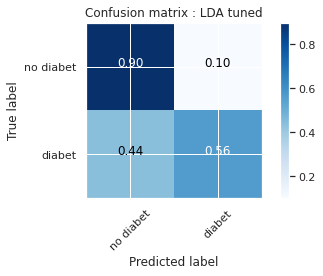

In [58]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes_name, normalize=True)
plt.title("Confusion matrix : LDA tuned")
plt.show()

In [59]:
TP = ((y_test == 1) & (y_pred_test == 1)).sum()
FN = ((y_test == 1) & (y_pred_test == -1)).sum()
FNR = FN/(FN+TP)
print(f'The FNR is {100*FNR:.2f}%')

The FNR is 43.94%


<div class="alert alert-block alert-warning">
The FNR is more than 40%, which is very bad for a medical application. 
In fact, when we classify dogs and cats, both error has the same importance. When you predict a cat whereas it was a dog, it is as serious as when you predict a dog instead of a cat. 

It is not the same for medical applications. 
In fact, it is much more serious when you say to someone he is not sick whereas he actually is sick, thant if you say to someone he is sick and he is not. 
You must have the smallest FNR possible !! 

To reduce our FNR, we are going to play with the thresolds we apply to our prediction to predict his class (1 or -1).
</div>

**Since a false negative can have an important medical impact, propose a new threshold for the predicted
score that leads to a FNR of less that 10% (this can be done by changing manually the value of the
intercept_ in the trained classifier**

In [60]:
model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.37)
model.fit(X_train_scaled, y_train)
y_pred_test, y_pred_proba, y_pred_train = get_preds(model)

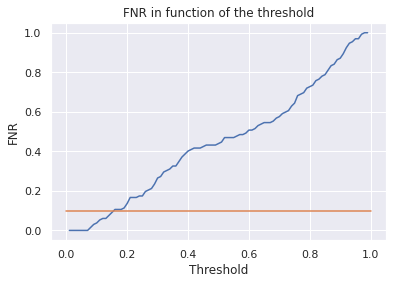

In [62]:
res = []
liste_threshold = np.arange(1,100)/100
for threshold in liste_threshold:
    y_tmp = np.array([int(y_pred_proba[i][1] > threshold) for i in range(len(y_test))])
    y_tmp = 2*y_tmp-1
    TP = ((y_test == 1) & (y_tmp == 1)).sum()
    FN = ((y_test == 1) & (y_tmp == -1)).sum()
    FNR = FN/(FN+TP)
    res.append([threshold, FNR])
res = np.array(res)
plt.title("FNR in function of the threshold")
plt.xlabel('Threshold')
plt.ylabel('FNR')
plt.plot(res[:,0], res[:,1])
plt.plot([0,1], [0.1, 0.1])
plt.show()

In [63]:
res[res[:,1] < 0.1][-1][0]

0.15

In [65]:
chosen_threshold = res[res[:,1] < 0.1][-1][0]
y_tmp = np.array([int(y_pred_proba[i][1] > chosen_threshold) for i in range(len(y_test))])
y_tmp = 2*y_tmp-1

Normalized confusion matrix


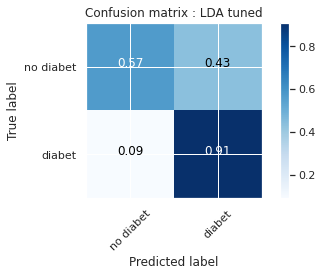

In [66]:
cnf_matrix = confusion_matrix(y_test, y_tmp)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes_name ,normalize=True)
plt.title("Confusion matrix : LDA tuned")
plt.show()

In [67]:
TP = ((y_test == 1) & (y_tmp == 1)).sum()
FN = ((y_test == 1) & (y_tmp == -1)).sum()
FNR = FN/(FN+TP)
print(f'The FNR is {100*FNR:.2f}%')

The FNR is 9.09%


In [68]:
accuracy_score(y_test, y_tmp)

0.6772616136919315

<div class="alert alert-block alert-warning">

When we reduce our threshold from 0.5 to 0.15, we reach a FNR of 9%. Logically, the accuracy has been reduced to only 67% (because the number of TN is lower), but from a medical point of view, it's much more better to have this kind of confusion matrix : we take less risk with the patients !
    
</div>

## 3 Predicting Classes on the Digits dataset

### 3.1 Evaluate the different supervised methods

Same than for the Pima dataset, let's create a function that will enable us to handle the different models' performances.

In [69]:
df_perf = pd.DataFrame()

def add_perf(df_perf, model_name, acc_test, acc_train):
    res = {
        'model' : [model_name], 
        'test_acc': [acc_test],
        'train_acc' : [acc_train]
        }

    tmp = pd.DataFrame(res)
    df_score = pd.concat([df_perf, tmp], ignore_index = True)
    return df_score

**For at least the following classifiers LinearDiscriminantAnalysis,LogisticRegression,SVC,MLPClassifier
do the following.**

**Fit the model with the default parameters and compute its prediction performance (accuracy on test
data).**

In [70]:
def get_acc(model):
    model.fit(xt, yt.ravel())
    y_pred = model.predict(x)
    yt_pred = model.predict(xt)
    acc_train = accuracy_score(yt, yt_pred.ravel())
    acc_test = accuracy_score(y, y_pred.ravel())
    print(f'Accuracy on train set : {acc_train:.3f}')
    print(f'Accuracy on test set : {acc_test:.3f}')
    return yt_pred, y_pred, acc_train, acc_test

In [71]:
models = {
    'LDA' : LinearDiscriminantAnalysis(),
    'Logistic regression' : LogisticRegression(),
    'SVC' : SVC(),
    'MLP' : MLPClassifier()
}

for model_name in models.keys():
    print('*'*25)
    print(f'Classifier : {model_name}')
    yt_pred, y_pred, acc_train, acc_test = get_acc(models[model_name])
    df_perf = add_perf(df_perf, model_name, acc_test, acc_train)

*************************
Classifier : LDA
Accuracy on train set : 0.996
Accuracy on test set : 0.897
*************************
Classifier : Logistic regression


/mnt/c/Users/Paul/Desktop/2122/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on train set : 1.000
Accuracy on test set : 0.971
*************************
Classifier : SVC
Accuracy on train set : 0.998
Accuracy on test set : 0.986
*************************
Classifier : MLP
Accuracy on train set : 1.000
Accuracy on test set : 0.980


In [72]:
df_perf

,model,test_acc,train_acc
0,LDA,0.897000,0.996
1,Logistic regression,0.971333,1.000
2,SVC,0.986000,0.998
3,MLP,0.980333,1.000


The model that has the best performances is the SVC. With the default parameters of the models we have already reached impressive performances : more than 98% of accuracy !

**Do a quick validation of some of the important parameters (manually or with sklearn classes) to get
a better performance if possible.**

**Store the model and the accuracy for the best parameter configuration.**

##### LDA

In [73]:
list_shrinkage = np.arange(1,100)/100
parameters = {'shrinkage' : list_shrinkage}

LDA = LinearDiscriminantAnalysis(solver='lsqr')
clf  = GridSearchCV(LDA, parameters)
clf.fit(xt, yt.ravel())

print('Best value of shrinkage :', clf.best_estimator_.get_params()['shrinkage'])

Best value of shrinkage : 0.32


In [74]:
best_lda = clf.best_estimator_
yt_pred, y_pred, acc_train, acc_test = get_acc(best_lda)
df_perf = add_perf(df_perf, 'LDA tuned', acc_test, acc_train)

Accuracy on train set : 0.978
Accuracy on test set : 0.958


In [75]:
print(df_perf[df_perf.model == 'LDA'])
print(df_perf[df_perf.model == 'LDA tuned'])

  model  test_acc  train_acc
0   LDA     0.897      0.996
       model  test_acc  train_acc
4  LDA tuned  0.957667      0.978


The regularization is very important for the LDA Classifier : we have gained more than 5% of accuracy with this Cross-Validation ! 

###### Logistic regression	

In [76]:
list_C = [0.1, 0.2, 0.5, 1, 2, 5, 10]
parameters = {'C' : list_C}

log_reg = LogisticRegression(penalty='l1', solver='liblinear')
clf  = GridSearchCV(log_reg, parameters)
clf.fit(xt, yt.ravel())

best_log_reg = clf.best_estimator_

print(f"Best value of C : {clf.best_estimator_.get_params()['C']}")

Best value of C : 10


In [77]:
best_lr = clf.best_estimator_
yt_pred, y_pred, acc_train, acc_test = get_acc(best_lr)
df_perf = add_perf(df_perf, 'Logistic regression tuned', acc_test, acc_train)

Accuracy on train set : 1.000
Accuracy on test set : 0.967


In [78]:
print(df_perf[df_perf.model == 'Logistic regression'])
print(df_perf[df_perf.model == 'Logistic regression tuned'])

                 model  test_acc  train_acc
1  Logistic regression  0.971333        1.0
                       model  test_acc  train_acc
5  Logistic regression tuned     0.967        1.0


Regularizing the Logistic regression doesn't improve the performance that is already extremely high !

##### SVC

In [79]:
from sklearn.model_selection import GridSearchCV
parameters = [{'kernel': ['rbf', 'poly'], 
               'C': [1, 10, 100, 1000, 10000]}]

print("Tuning hyper-parameters")
svc = GridSearchCV(SVC(probability=True), parameters, cv = 5)
svc.fit(xt, yt.ravel())

best_svc = svc.best_estimator_
C = best_svc.get_params()['C']
gamma = best_svc.get_params()['gamma']
kernel = best_svc.get_params()['kernel']
print(f'BEST PARAMETERS : C={C}, gamma={gamma}, kernel:{kernel}')

Tuning hyper-parameters
BEST PARAMETERS : C=10, gamma=scale, kernel:rbf


In [80]:
best_svc = svc.best_estimator_
yt_pred, y_pred, acc_train, acc_test = get_acc(best_svc)
df_perf = add_perf(df_perf, 'SVC tuned', acc_test, acc_train)

Accuracy on train set : 1.000
Accuracy on test set : 0.986


In [82]:
print(df_perf[df_perf.model == 'SVC'])
print(df_perf[df_perf.model == 'SVC tuned'])

  model  test_acc  train_acc
2   SVC     0.986      0.998
       model  test_acc  train_acc
6  SVC tuned  0.986333        1.0


Regularizing the SVC doesn't really change the performance that is already extremely high !

###### MLP

In [83]:
parameters = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1],
               'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
              }

print("Tuning hyper-parameters")
mlp = GridSearchCV(MLPClassifier(), parameters, cv=3, verbose=3)
mlp.fit(xt, yt.ravel())

best_mlp = mlp.best_estimator_
alpha = best_mlp.get_params()['alpha']
hidden_layer_sizes = best_mlp.get_params()['hidden_layer_sizes']
print(f'alpha={alpha}, hidden_layer_sizes={hidden_layer_sizes}')

Tuning hyper-parameters
Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END alpha=1e-05, hidden_layer_sizes=(50, 50, 50);, score=0.982 total time=   1.0s
[CV 2/3] END alpha=1e-05, hidden_layer_sizes=(50, 50, 50);, score=0.978 total time=   1.2s
[CV 3/3] END alpha=1e-05, hidden_layer_sizes=(50, 50, 50);, score=0.972 total time=   1.1s
[CV 1/3] END alpha=1e-05, hidden_layer_sizes=(50, 100, 50);, score=0.974 total time=   1.2s
[CV 2/3] END alpha=1e-05, hidden_layer_sizes=(50, 100, 50);, score=0.980 total time=   1.1s
[CV 3/3] END alpha=1e-05, hidden_layer_sizes=(50, 100, 50);, score=0.972 total time=   1.1s
[CV 1/3] END alpha=1e-05, hidden_layer_sizes=(100,);, score=0.978 total time=   1.5s
[CV 2/3] END alpha=1e-05, hidden_layer_sizes=(100,);, score=0.986 total time=   1.5s
[CV 3/3] END alpha=1e-05, hidden_layer_sizes=(100,);, score=0.976 total time=   1.5s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=(50, 50, 50);, score=0.978 total time=   1.1s
[CV 2/3] END alpha=

In [84]:
best_mlp = svc.best_estimator_
yt_pred, y_pred, acc_train, acc_test = get_acc(best_mlp)
df_perf = add_perf(df_perf, 'MLP tuned', acc_test, acc_train)

Accuracy on train set : 1.000
Accuracy on test set : 0.986


In [86]:
print(df_perf[df_perf.model == 'MLP'])
print(df_perf[df_perf.model == 'MLP tuned'])

  model  test_acc  train_acc
3   MLP  0.980333        1.0
       model  test_acc  train_acc
7  MLP tuned  0.986333        1.0


Regularizing the MLP doesn't really change the performance that is already extremely high !

### 3.2 Interpreting the classifier

**Compare the performances of the different methods (with different metrics). Which model is the best
on test data**

In [87]:
df_perf.sort_values(by='test_acc', ascending=False)

,model,test_acc,train_acc
6,SVC tuned,0.986333,1.000
7,MLP tuned,0.986333,1.000
2,SVC,0.986000,0.998
3,MLP,0.980333,1.000
1,Logistic regression,0.971333,1.000
5,Logistic regression tuned,0.967000,1.000
4,LDA tuned,0.957667,0.978
0,LDA,0.897000,0.996


The best model is the SVC Classifier, with a well chosen regularization and kernel (obtained with a 5-fold cross-validation).

**Select the best classifier from the previous section and use it to predict labels on the test data.**

In [88]:
best_classif = svc.best_estimator_
yt_pred, y_pred, acc_train, acc_test = get_acc(best_classif)

Accuracy on train set : 1.000
Accuracy on test set : 0.986


**Compute the confusion matrix and interpret the errors made by the classifier. What is the class that
is the most difficult to recognize? Are there somme classes that are harder to discriminate?**

Confusion matrix, without normalization


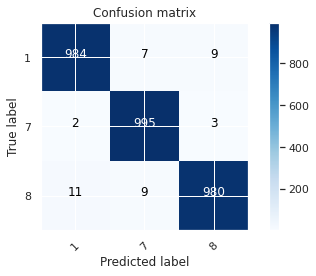

Normalized confusion matrix


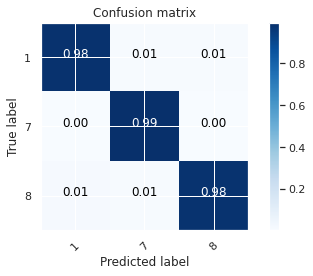

In [89]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y.ravel(), y_pred)
plot_confusion_matrix(cm, ['1', '7', '8'])
plt.show()
plot_confusion_matrix(cm, ['1', '7', '8'], normalize=True)

<div class="alert alert-block alert-warning">
    
The first confusion matrix (not normalized) has a better interpretability here, because the scores are extremely high. 
We can see that the 8 are the more complex digits to classify : 11 were considered as a 1, and 9 as a 7.
When we observed the digits at the beginning, we noticed that some 8 seems not to be finished. I think this can explain this errors : it will be interesting to confirm this idea observing the missclassified samples !
    
There are also a few erros for the 1 digit.
    
But for the digit 7, the classification is almost perfect : only 5 errors out of 1000 samples !!
</div>

**Plot some of the sample that are miss-classified. Are they difficult to recognize ? Why did the classifier
fail to recognize them?**

In [90]:
misclassified = np.argwhere(y.ravel() != y_pred).flatten()
n_missclassied = len(misclassified)

print(f'{n_missclassied} samples (out of {len(y)}) were missclassified')

41 samples (out of 3000) were missclassified


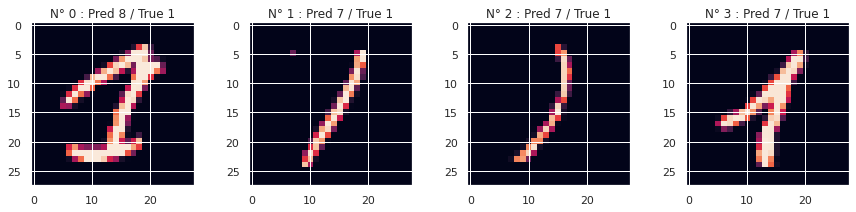

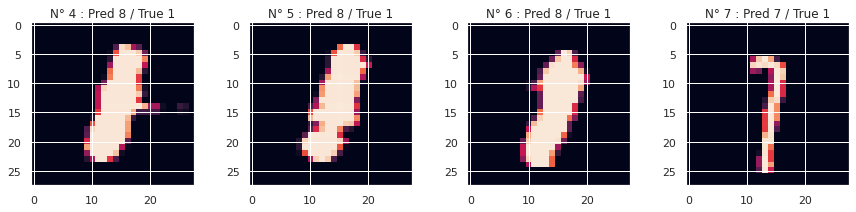

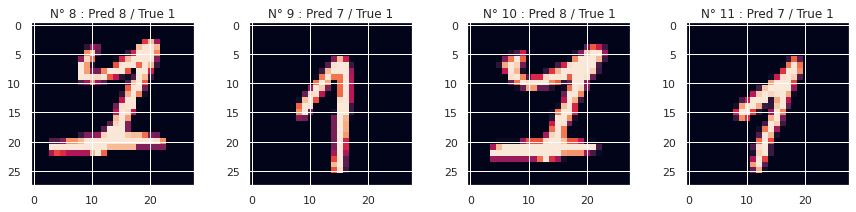

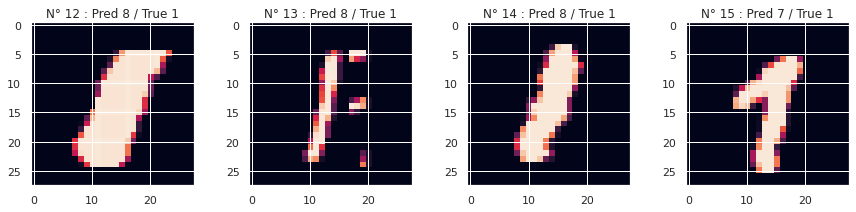

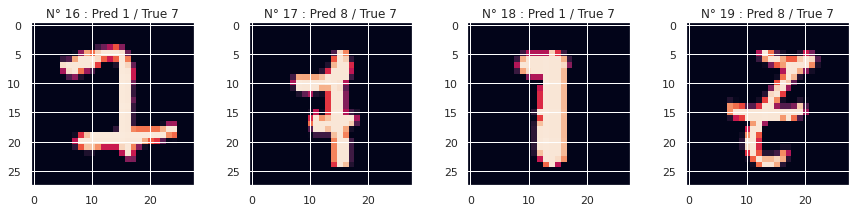

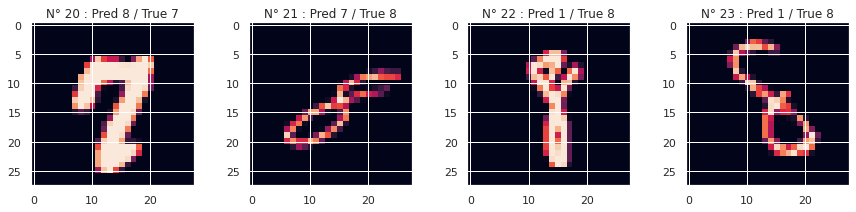

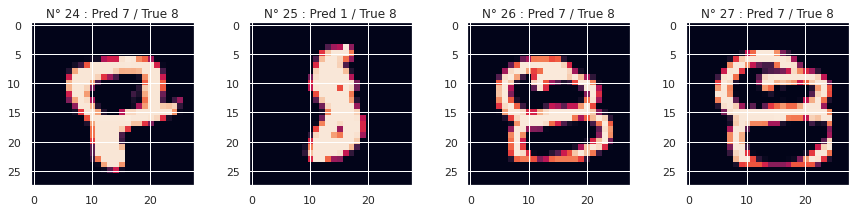

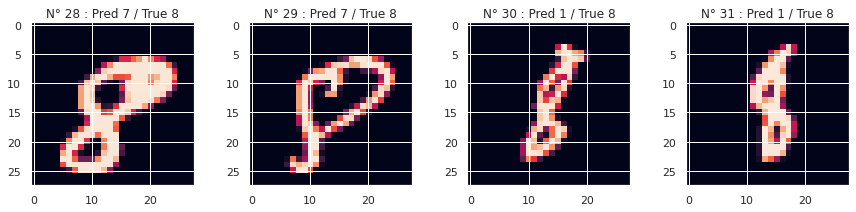

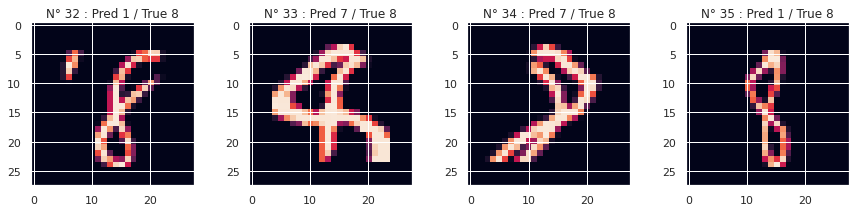

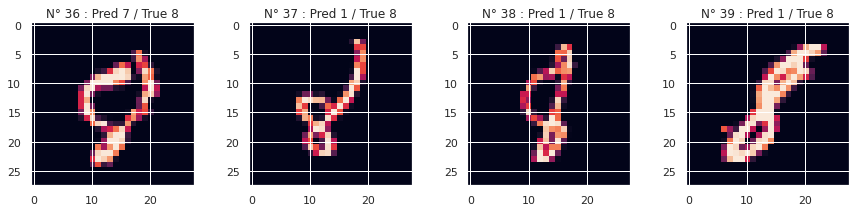

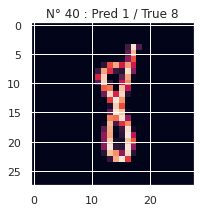

In [92]:
for i, ind in enumerate(misclassified):
    true_label = y[ind][0]
    pred_label = y_pred[ind]
    if i%4 == 0:
        plt.figure(figsize=(15,3))
    plt.subplot(int(f'14{(i%4)+1}'))
    plt.imshow(x[ind].reshape(28, 28))
    plt.title(f'N° {i} : Pred {pred_label} / True {true_label}')
    if i%4 == 3:
        plt.show()

<div class="alert alert-block alert-warning">

Here you can see all the missclassified samples. 
For most of them, it's not surprising at all that the prediction were wrong : there are even difficult to predict for a human eye !
    
All the 8 digit missclassified are very weird forms, far away from a classic 8. See especially the N°37, the N°33 that is a '4' for me or the N°29 that looks like a heart !
    
Concerning the wrong 7, N°16 and N°18 are 1 for me, I would have done the same mistake than the classifier !
    
Finally for the wrong 1, some of them are very inclined and other have large thickness, which make the classifier think they are 8.
</div>

**Pick a well classified sample and create 1000 noisy samples of it by adding gaussian noise (np.random.
randn). Pick a level of noise that allows you to still distinguish clearly the class. Compute the accuracy
of the classifier on those 1000 noisy samples. If the accuracy is 1, increase the noise level or choose
another well classified sample.**

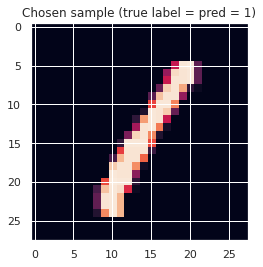

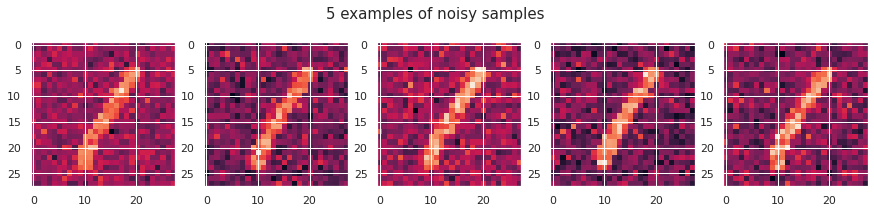

Accuracy on noisy samples : 0.874


In [93]:
well_classif = np.argwhere(y_pred == y.ravel()).flatten()
sample_chosen = x[well_classif[0]]
plt.title(f'Chosen sample (true label = pred = {y[well_classif[0]][0]})')
plt.imshow(sample_chosen.reshape(28, 28))
plt.show()

new_samples_noise = []
for cpteur in range(1000):
    noise = np.random.randn(sample_chosen.shape[0])
    new_img = sample_chosen + noise/4
    new_samples_noise.append(new_img)
new_samples_noise = np.array(new_samples_noise)

plt.figure(figsize=(15, 5))
for i in range(5):
    ind = int(f'15{i+1}')
    plt.subplot(ind)
    plt.imshow(new_samples_noise[np.random.choice(1000)].reshape(28,28))
plt.suptitle('5 examples of noisy samples', fontsize=15, y=0.8)
plt.show()

labels_preds = best_classif.predict(new_samples_noise)
labels_true = [1]*len(new_samples_noise)
acc = accuracy_score(labels_preds, labels_true)

print(f'Accuracy on noisy samples : {acc}')

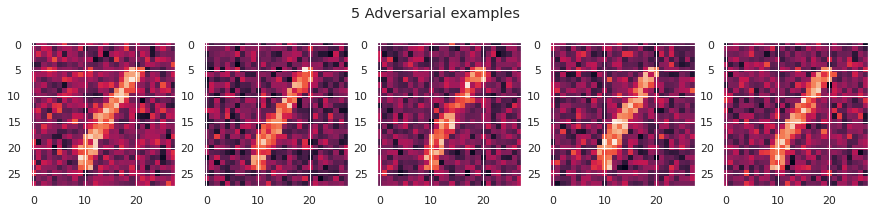

In [94]:
plt.figure(figsize=(15,5))
adversarial_examples_ind = np.argwhere(labels_preds != 1)
for i, ind in enumerate(adversarial_examples_ind[:5]):
    plt.subplot(int(f'15{i+1}'))
    plt.imshow(new_samples_noise[ind].reshape(28, 28))
plt.suptitle('5 Adversarial examples', y=0.8)
plt.show()

<div class="alert alert-block alert-warning">
    
We can't say that the classifier is really robust. When we add a few gaussian noise, we are, as human being, capable to still see a digit 1 here. But the accuracy of our classifier is only of 87% for this specific digit. It seems quiet easy to fool our classifier unfortunately !
</div>

### Bonus: Convolutional Neural network (CNN)

**Implement a CNN and train it on the data (you will need to reshape it to store it as images). Investigate
te performance of the CNN when varying its parameters. Does it have better performance than the model
above? Is it more robust to adversarial examples?**

In [95]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers

2021-11-01 19:00:11.738785: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-01 19:00:11.741144: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [96]:
Y_train = yt.copy()
Y_train[Y_train==1]=0
Y_train[Y_train==7]=1
Y_train[Y_train==8]=2

Y_test = y.copy()
Y_test[Y_test==1]=0
Y_test[Y_test==7]=1
Y_test[Y_test==8]=2

img_rows, img_cols, nb_channels = 28, 28, 1
X_train = xt.reshape(xt.shape[0], img_rows, img_cols, nb_channels)
X_test = x.reshape(x.shape[0], img_rows, img_cols, nb_channels)
Y_train = to_categorical(Y_train, num_classes=3)
Y_test = to_categorical(Y_test, num_classes=3)

In [97]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), name='Conv1', strides=(1,1), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), name='Conv2', strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

2021-11-01 19:00:19.134058: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-01 19:00:19.135571: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-01 19:00:19.137291: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-G2JJFA82): /proc/driver/nvidia/version does not exist
2021-11-01 19:00:19.143340: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [98]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5, batch_size=32)
score = model.evaluate(X_test, Y_test, verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

acc_train = score[0]
acc_test = score[1]
df_perf = add_perf(df_perf, 'CNN', acc_test, acc_train)
df_perf.sort_values(by='test_acc', ascending=False).reset_index()

2021-11-01 19:00:19.398468: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
47/47 [==============================] - 3s 62ms/step - loss: 0.2001 - accuracy: 0.9327
Epoch 2/5
47/47 [==============================] - 1s 24ms/step - loss: 0.0557 - accuracy: 0.9820
Epoch 3/5
47/47 [==============================] - 2s 36ms/step - loss: 0.0191 - accuracy: 0.9920
Epoch 4/5
47/47 [==============================] - 2s 34ms/step - loss: 0.0023 - accuracy: 0.9993
Epoch 5/5
47/47 [==============================] - 1s 28ms/step - loss: 0.0042 - accuracy: 0.9980
Test loss: 0.12743309140205383
Test accuracy: 0.9776666760444641


,index,model,test_acc,train_acc
0,6,SVC tuned,0.986333,1.000000
1,7,MLP tuned,0.986333,1.000000
2,2,SVC,0.986000,0.998000
3,3,MLP,0.980333,1.000000
4,8,CNN,0.977667,0.127433
5,1,Logistic regression,0.971333,1.000000
6,5,Logistic regression tuned,0.967000,1.000000
7,4,LDA tuned,0.957667,0.978000
8,0,LDA,0.897000,0.996000


<div class="alert alert-block alert-warning">
    
For this digit classification, the CNN model is only the 5th in term of accuracy. 
CNN works well for complex image classification, because they are able to learn complex features, but are not needed for this kind of 'simple' application ! SVC is still the better classifier here. 
</div>

In [99]:
X_noise = new_samples_noise.reshape(new_samples_noise.shape[0], img_rows, img_cols, nb_channels)
Y_noise = np.array([[1,0,0] for i in range(len(X_noise))])
score_noise = model.evaluate(X_noise, Y_noise, verbose=False)
acc_noisy = score_noise[1]

print(f'Accuracy on noisy samples {acc_noisy:.3f}')

Accuracy on noisy samples 0.764


<div class="alert alert-block alert-warning">
And when we look at the adversarial samples, we can notice that it is even more easy to fool the CNN than the SVC ! </div>

<div class="alert alert-block alert-success">
<b>Conclusion:</b>

1) What was hard to understand ?
    
The notion of adversarial examples is not easy to understand, but is is much more easy when you plot some examples !
    
    
2) What was new ? + personal discussion about how to use these tools in a professional setting
    
I had already heard of the AUC score and the confusion matrix but applying it to a medical application makes it much more clear and I have now understand why do we use other metrics than the accuracy.
In the professional world, it will always be important to think about the importance of an error, and to adapt consequently the metrics that we will use to choose our model. 
    
</div>